In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

C:\Users\97156\AppData\Local\Temp\ipykernel_6500\2181792710.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_data.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [3]:
df['StateHoliday'] = df['StateHoliday'].astype('category')
df= pd.get_dummies(df,prefix=['StateHoliday'], columns = ['StateHoliday'],drop_first=True)

In [4]:
df[["Year", "Month", "Day"]] = df["Date"].str.split("-", expand = True).astype('int64')
df = df.drop("Date", axis='columns')

In [5]:
cols = df.columns.values.tolist()
cols.remove('Sales')
cols.append('Sales')
df = df[cols]

In [6]:
#the stores will not make any sales when they are closed, therefore the column is redundant and removing it will reduce the features for better prediction
df.drop('Open', inplace=True, axis=1)

In [7]:
print(df.head(),'\n',df.shape)

   Store  DayOfWeek  Customers  Promo  SchoolHoliday  StateHoliday_0  \
0      1          2        568      1              0               1   
1      2          2        877      1              0               1   
2      3          2       1072      1              1               1   
3      4          2       1488      1              0               1   
4      5          2        645      1              0               1   

   StateHoliday_a  StateHoliday_b  StateHoliday_c  Year  Month  Day  Sales  
0               0               0               0  2015      6   30   5735  
1               0               0               0  2015      6   30   9863  
2               0               0               0  2015      6   30  13261  
3               0               0               0  2015      6   30  13106  
4               0               0               0  2015      6   30   6635   
 (982644, 13)


In [8]:
df.nunique()

Store              1115
DayOfWeek             7
Customers          4076
Promo                 2
SchoolHoliday         2
StateHoliday_0        2
StateHoliday_a        2
StateHoliday_b        2
StateHoliday_c        2
Year                  3
Month                12
Day                  31
Sales             21642
dtype: int64

          Sales
Store          
1       3595588
2       3750093
3       5224726
4       7279572
5       3518628
...         ...
1111    3969314
1112    7747622
1113    5015131
1114   15575997
1115    4732642

[1115 rows x 1 columns]


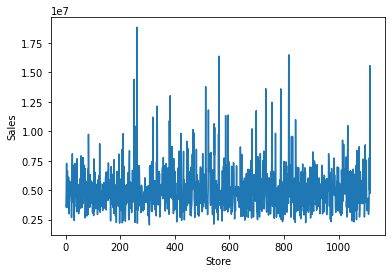

                Sales
DayOfWeek            
1          1093774659
2           989206946
3           915691079
4           871933439
5           940300240
6           821530789
7            28420855


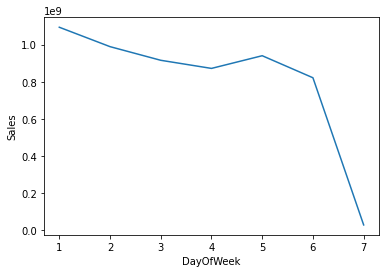

           Sales
Customers       
0              0
3              0
5              0
8             46
13           124
...          ...
5297       37403
5387       34692
5458       38484
5494       35702
7388       27190

[4076 rows x 1 columns]


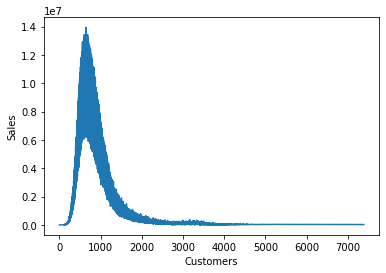

           Sales
Month           
1      566728724
2      528734410
3      599831906
4      575895295
5      569248217
6      578112775
7      382736589
8      361791202
9      342570131
10     351878728
11     369498877
12     433831153


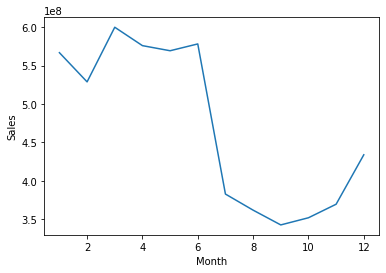

         Sales
Day           
1    146993888
2    225066876
3    186052424
4    222246734
5    212599928
6    189554066
7    194987463
8    182803145
9    168984245
10   173974454
11   177111067
12   173964974
13   181413450
14   170842725
15   186506818
16   205219196
17   197121554
18   206859185
19   194802541
20   188207587
21   176274324
22   177062398
23   183322033
24   160000458
25   155497913
26   161688063
27   183557587
28   187837724
29   168614277
30   211140763
31   110550147


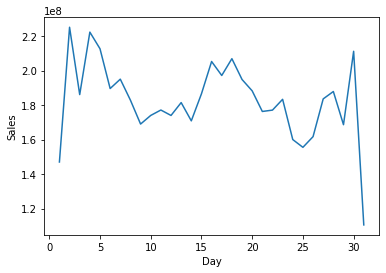

In [9]:
plotFeatures=list(df.columns.values)
del plotFeatures[3:10]
del plotFeatures[-1]
for feature in plotFeatures:
    print(df[[feature,'Sales']].groupby([feature]).sum())
    plt.plot(df[[feature,'Sales']].groupby([feature]).sum())
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

            Sales
Promo            
0      2678110016
1      2982747991


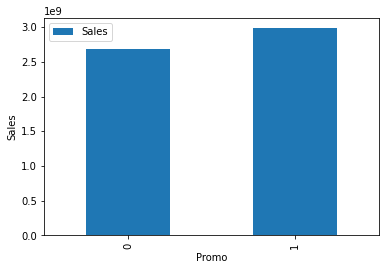

                    Sales
SchoolHoliday            
0              4578696753
1              1082161254


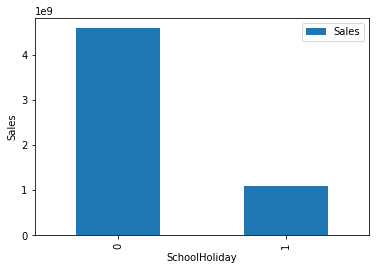

                     Sales
StateHoliday_0            
0                383164877
1               5277693130


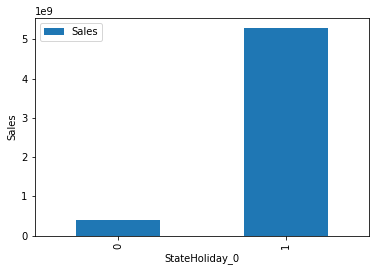

                     Sales
StateHoliday_a            
0               5654967702
1                  5890305


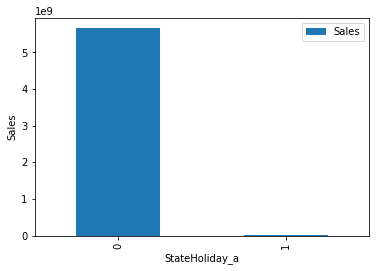

                     Sales
StateHoliday_b            
0               5659424263
1                  1433744


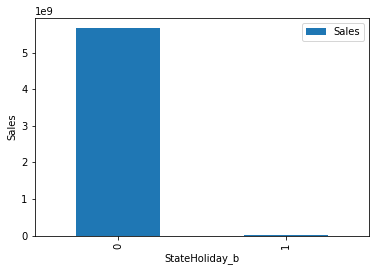

                     Sales
StateHoliday_c            
0               5660166201
1                   691806


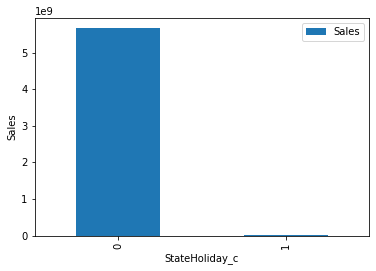

In [116]:
countFeatures=list(df.columns.values)
del countFeatures[9:]
del countFeatures[:3]
for feature in countFeatures:
    groupedDF = df[[feature,'Sales']].groupby([feature]).sum()
    print(groupedDF)
    groupedDF.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)
y_train = scy.fit_transform(y_train.reshape(-1, 1))
y_test = scy.transform(y_test.reshape(-1, 1))

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

LR= LinearRegression()
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test,LR_y_pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, LR_y_pred))

mean_squared_error :  0.15597012094545226
mean_absolute_error :  0.2750183831544253


MSE makes more sense because it is not swayed by outliers as much, which this dataset has alot of. another good metric is the R2 score.

In [14]:
for store in df["Store"].unique():
    storeDF = df.query("Store == {}".format(store))
    X = storeDF.iloc[:, 1:-1].values
    y = storeDF.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    scx = StandardScaler()
    scy = StandardScaler()
    X_train = scx.fit_transform(X_train)
    X_test = scx.transform(X_test)
    y_train = scy.fit_transform(y_train.reshape(-1, 1))
    y_test = scy.transform(y_test.reshape(-1, 1))
    LR= LinearRegression()
    LR.fit(X_train, y_train)
    LR_y_pred = LR.predict(X_test)
    print('mean_squared_error for store {}: '.format(store), mean_squared_error(y_test, LR_y_pred))

mean_squared_error for store 1:  0.015416706582390425
mean_squared_error for store 2:  0.03131244988877556
mean_squared_error for store 3:  0.02001218281628088
mean_squared_error for store 4:  0.013467458083986335
mean_squared_error for store 5:  0.03360675158374076
mean_squared_error for store 6:  0.01541659323307572
mean_squared_error for store 7:  0.026395672331876098
mean_squared_error for store 8:  0.020516627396482714
mean_squared_error for store 9:  0.01646086267028367
mean_squared_error for store 10:  0.019282762549142716
mean_squared_error for store 11:  0.03561293571056131
mean_squared_error for store 12:  0.02497843743519996
mean_squared_error for store 13:  0.03019473254102158
mean_squared_error for store 14:  0.011923083654328108
mean_squared_error for store 15:  0.02263293321265975
mean_squared_error for store 16:  0.027304270212270318
mean_squared_error for store 17:  0.027760146790866736
mean_squared_error for store 18:  0.02271148729698237
mean_squared_error for store 

This performs better because the store id number, an identification feature with no predictive power, was contributing to the weight tuning in the first model. it also reveals the variablity of the sales for individual stores 

In [15]:
import xgboost as xgb
sc = StandardScaler()
Sdf = pd.DataFrame(sc.fit_transform(df))
X = Sdf.iloc[:, :-1].values
y = Sdf.iloc[:, -1].values
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print( cv_results["test-rmse-mean"].tail(1).to_numpy()[0])

0.37442589036609


In [16]:
from sklearn.linear_model import Ridge
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
scx = StandardScaler()
scy = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)
y_train = scy.fit_transform(y_train.reshape(-1, 1))
y_test = scy.transform(y_test.reshape(-1, 1))
RR = Ridge()
RR.fit(X_train, y_train)
RR_y_pred = RR.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test,RR_y_pred))

mean_squared_error :  0.15597011303401465


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
RFR = RandomForestRegressor(max_depth=2, random_state=1)
pca = PCA(n_components=6)
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)
RFR.fit(X_train, y_train)
RFR_y_pred = RFR.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test,RFR_y_pred))

C:\Users\97156\AppData\Local\Temp\ipykernel_6500\3678561823.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train, y_train)


mean_squared_error :  0.39909739807409866


In [22]:
for store in df["Store"].unique():
    storeDF = df.query("Store == {}".format(store))
    X = storeDF.iloc[:, 1:-1].values
    y = storeDF.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    scx = StandardScaler()
    scy = StandardScaler()
    X_train = scx.fit_transform(X_train)
    X_test = scx.transform(X_test)
    y_train = scy.fit_transform(y_train.reshape(-1, 1))
    y_test = scy.transform(y_test.reshape(-1, 1))
    pca = PCA(n_components=6)
    X_train= pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    RFR = RandomForestRegressor(max_depth=2, random_state=1)
    RFR.fit(X_train, y_train)
    RFR_y_pred = RFR.predict(X_test)
    print('mean_squared_error for store {}: '.format(store), mean_squared_error(y_test, RFR_y_pred))

mean_squared_error for store 1:  0.1350240161693304
mean_squared_error for store 2:  0.12322680298840624
mean_squared_error for store 3:  0.12209501170166644
mean_squared_error for store 4:  0.10849916883466762
mean_squared_error for store 5:  0.13737948515766726
mean_squared_error for store 6:  0.1298101749017048
mean_squared_error for store 7:  0.12383269586267591
mean_squared_error for store 8:  0.09337936584881354
mean_squared_error for store 9:  0.09378589577427589
mean_squared_error for store 10:  0.07694124098618335
mean_squared_error for store 11:  0.22249620530315684
mean_squared_error for store 12:  0.0945925960533788
mean_squared_error for store 13:  0.1901045819848244
mean_squared_error for store 14:  0.1394163757015218
mean_squared_error for store 15:  0.11016472651668117
mean_squared_error for store 16:  0.11485700138169061
mean_squared_error for store 17:  0.15088599391477114
mean_squared_error for store 18:  0.13786816881168298
mean_squared_error for store 19:  0.146295

In [11]:
from pmdarima import auto_arima
tsDf = pd.read_csv('train_data.csv')
stepwise_fit = auto_arima(tsDf["Sales"],trace=True)
stepwise_fit.summary()


C:\Users\97156\AppData\Local\Temp\ipykernel_10300\3240536015.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  tsDf = pd.read_csv('train_data.csv')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18259539.545, Time=191.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18876047.170, Time=14.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18609984.476, Time=18.98 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18255197.526, Time=181.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18876045.170, Time=11.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18254962.635, Time=317.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18271657.365, Time=172.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18259675.531, Time=169.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18254958.412, Time=352.76 sec


In [26]:
from statsmodels.tsa.arima.model import ARIMA
tsDf = pd.read_csv('train_data.csv')
X = pd.to_datetime(tsDf["Date"])
y = tsDf["Sales"]
train = y.iloc[: -30]
test = y.iloc[-30:]
model = ARIMA(train,order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:               982614
Model:                 ARIMA(0, 1, 0)   Log Likelihood            -9437745.685
Date:                Sat, 04 Feb 2023   AIC                       18875493.370
Time:                        16:48:56   BIC                       18875505.168
Sample:                             0   HQIC                      18875496.619
                             - 982614                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.289e+07   9441.251   1364.802      0.000    1.29e+07    1.29e+07
===================================================================================
Ljung-Box (L1) (Q):              233082.27   Jarque-Bera (JB):           1276180.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [41]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
scx = StandardScaler()
scy = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)
y_train = scy.fit_transform(y_train.reshape(-1, 1))
y_test = scy.transform(y_test.reshape(-1, 1))

In [49]:
X_train.shape

(786115, 12)

In [60]:
model = Sequential()
model.add(LSTM(12, input_shape=(12,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics =["mse"])
model.fit((X_train), y_train, epochs=10, batch_size=1000, verbose=1)

Epoch 1/10
787/787 [==============================] - 9s 9ms/step - loss: 0.4410 - mse: 0.4410
Epoch 2/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1972 - mse: 0.1972
Epoch 3/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1639 - mse: 0.1639
Epoch 4/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1469 - mse: 0.1469
Epoch 5/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1388 - mse: 0.1388
Epoch 6/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1342 - mse: 0.1342
Epoch 7/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1317 - mse: 0.1317
Epoch 8/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1295 - mse: 0.1295
Epoch 9/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1282 - mse: 0.1282
Epoch 10/10
787/787 [==============================] - 7s 9ms/step - loss: 0.1270 - mse: 0.1270


In [63]:
for store in df["Store"].unique():
    storeDF = df.query("Store == {}".format(store))
    X = storeDF.iloc[:, :-1].values
    y = storeDF.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    scx = StandardScaler()
    scy = StandardScaler()
    X_train = scx.fit_transform(X_train)
    X_test = scx.transform(X_test)
    y_train = scy.fit_transform(y_train.reshape(-1, 1))
    y_test = scy.transform(y_test.reshape(-1, 1))
    model = Sequential()
    model.add(LSTM(12, input_shape=(12,1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics =["mse"])
    model.fit((X_train), y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
728/728 [==============================] - 4s 4ms/step - loss: 0.7295 - mse: 0.7295
Epoch 2/10
728/728 [==============================] - 3s 4ms/step - loss: 0.3805 - mse: 0.3805
Epoch 3/10
728/728 [==============================] - 3s 4ms/step - loss: 0.2410 - mse: 0.2410
Epoch 4/10
728/728 [==============================] - 3s 4ms/step - loss: 0.2003 - mse: 0.2003
Epoch 5/10
728/728 [==============================] - 3s 4ms/step - loss: 0.1821 - mse: 0.1821
Epoch 6/10
728/728 [==============================] - 3s 4ms/step - loss: 0.1683 - mse: 0.1683
Epoch 7/10
728/728 [==============================] - 3s 4ms/step - loss: 0.1625 - mse: 0.1625
Epoch 8/10
728/728 [==============================] - 3s 4ms/step - loss: 0.1552 - mse: 0.1552
Epoch 9/10
728/728 [==============================] - 3s 4ms/step - loss: 0.1349 - mse: 0.1349
Epoch 10/10
728/728 [==============================] - 3s 4ms/step - loss: 0.1092 - mse: 0.1092
Epoch 1/10
728/728 [=============================

KeyboardInterrupt: 

We can see that segmenting them by cluster or individual stores performs better than training the whole dataset. the mse went from 0.13 for all stores to 0.1 for the first store as an example. another store reached 0.9 as well.

In [69]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
scx = StandardScaler()
scy = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)
y_train = scy.fit_transform(y_train.reshape(-1, 1))
y_test = scy.transform(y_test.reshape(-1, 1))

In [75]:
model2 = Sequential([Dense(64, activation='relu',input_shape=(12,1)),Dropout(0.2),Dense(64, activation='relu'),Dense(1)])
model2.compile(optimizer='adam',loss = 'mean_squared_error',metrics = ['mse'])
model2.fit(X_train, y_train, epochs=10, batch_size=1000, verbose=1)

Epoch 1/10
787/787 [==============================] - 17s 20ms/step - loss: 0.9881 - mse: 0.9881
Epoch 2/10
787/787 [==============================] - 16s 21ms/step - loss: 0.9817 - mse: 0.9817
Epoch 3/10
787/787 [==============================] - 16s 21ms/step - loss: 0.9693 - mse: 0.9693
Epoch 4/10
787/787 [==============================] - 16s 20ms/step - loss: 0.9593 - mse: 0.9593
Epoch 5/10
787/787 [==============================] - 16s 20ms/step - loss: 0.9549 - mse: 0.9549
Epoch 6/10
787/787 [==============================] - 16s 20ms/step - loss: 0.9519 - mse: 0.9519
Epoch 7/10
787/787 [==============================] - 16s 21ms/step - loss: 0.9481 - mse: 0.9481
Epoch 8/10
787/787 [==============================] - 17s 21ms/step - loss: 0.9430 - mse: 0.9430
Epoch 9/10
787/787 [==============================] - 16s 20ms/step - loss: 0.9378 - mse: 0.9378
Epoch 10/10
787/787 [==============================] - 16s 20ms/step - loss: 0.9338 - mse: 0.9338


ANN performed similar to the LSTM for individual stores but ANN was much faster and used the entire dataset.